## Import Environment

In [85]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

##Import libraries sesuai dengan kebutuhan 

## Pendahuluan

### Latar Belakang

 Di era digital yang kompetitif ini, customer churn menjadi momok bagi perusahaan, khususnya di industri telekomunikasi. Meningkatnya churn rate dapat menggerus keuntungan dan menghambat pertumbuhan bisnis.Customer churn pada dasarnya adalah pelanggan yang berhenti menggunakan layanan atau produk bisnis. Mereka bisa jadi pelanggan yang tidak lagi melakukan pembelian atau berhenti berlangganan.

    Tingkat churn yang tinggi tentu tidak diinginkan karena merugikan bisnis. Pada case analisis ini menggunakan dari dataset perusahaan tekomunikasi. Pada peruhasaan telekomunikasi di berbagai negara termasuk Pasar Oligopoli yang memiliki persaingan ketat untuk mendapatkan customer, tidak hanya itu perusahaan telekomunikasi juga sensitive pada keputusan perusaahan pada industri yang sama. sehingga diperlukan analisi untuk mengambil keputusan yang tepat.

Dampat tingkat churn customer dapat berakibat fatal pada bisnis, sebagai berikut : 
  1. Kehilangan pendapatan: Pelanggan yang churn berarti hilangnya sumber pendapatan.
  2. Meningkatnya biaya akuisisi: Mencari pelanggan baru jauh lebih mahal daripada mempertahankan pelanggan lama.
  3. Menurunkan reputasi: Churn rate yang tinggi dapat merusak citra perusahaan di mata pelanggan.

 Dengan berbagai dampak yang ditimbulkan diperlukan langkah strategis agar tingkat churn dapat dikurangi dan bisnis dapat berjalan dengan baik, sebagai berikut langkah strategis yang akan digunakan : 
  1. Melakukan analisis data: Mengidentifikasi pelanggan yang berisiko churn dan memahami alasan mereka churn.
  2. Mengembangkan budaya customer-centric: Menjadikan pelanggan sebagai fokus utama dalam semua keputusan bisnis.
  3. Meningkatkan komunikasi dengan pelanggan: Memberikan informasi yang jelas tentang produk dan layanan, serta memberikan solusi yang cepat dan tepat      atas keluhan pelanggan.
  4. Membangun hubungan pelanggan yang kuat: Memberikan layanan pelanggan yang personal dan berfokus pada kebutuhan pelanggan.

    Churn rate yang tinggi adalah tantangan yang serius bagi perusahaan telekomunikasi.Dengan melakukan analisis churn rate, mengembangkan strategi retensi dan akuisisi pelanggan yang efektif, serta memahami faktor-faktor yang memengaruhi churn, perusahaan dapat menangkal churn dan mempertahankan bisnisnya.

### Rumusan Masalah

1. Bagaimana korelasi anatara demography customer dengan tingkat churn ?
2. Apakah layanan perusahaan berdampak pada tingkat churn ? dan faktor apa yang paling memengaruhi churn ?
3. Apakah terdapat hubungan financial customer pada perusahaan dengan tingkat churn ?
4. Bagaimana hasil prediksi churn dimasa mendatang akan menurun atau meningkat ? 

## Memahami Data

In [86]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

Pada analisis data ini menggunakan dataset dari kaggle mengenai Teleco Customer Chun

In [87]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [88]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

Dataset Teleco Churn memilili 7043 baris dan 21 kolom yang berisi informasi mengenai customer yang mengalami Churn dan tidak mengalami Churn, sebagai berikut penjelasan masing - masing kolom pada dataset :

1. Pada dataset ini memiliki colom churn yang mengindetifikasi pada periode dataset ini mengalami Churn atau Tidak.
2. Colom berisi Demografik Customer seperti Gender, SeniorCitizen, dan Partner, faktor tersebut dimasukkan untuk memahami apakah terdapat faktor
   internal customer yang memengaruhi tingkat churn.
3. Layanan perusahaan Teleco kepada customer seperti PhoneService, Multiplelines, Internet service, dan lain - lain.
4. Informasi customer dari segi financial seperti pengeluaran tiap bulan, total pengeluaran selama menggunakan layanan, tanggungan biaya lainnya, metode
   pembayaran
5. informasi lanjutan dari customer seperti berapa lama berlangganan (tenure dalam hitungan bulan) dan TechSupport yang berisi customer memiliki akses
   atau berapa kali melakukan permintaan bantuan layanan.

In [89]:
df.shape

(7043, 21)

Pada struktur data terdapat 7043 baris dengan 21 colom 

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Pada data set ini tidak terdapat adanya nilai null pada semua row dan coloumn, dan terdapat bentuk jenis data berupa float64(1), int64(2), object(18)

In [91]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Pada data set ini, didominasi oleh tipe data berupa object

#Melakukan pengecekan lebih lanjut pada Missing Value pada data set

In [7]:
import pandas as pd
import missingno as msno

<Axes: >

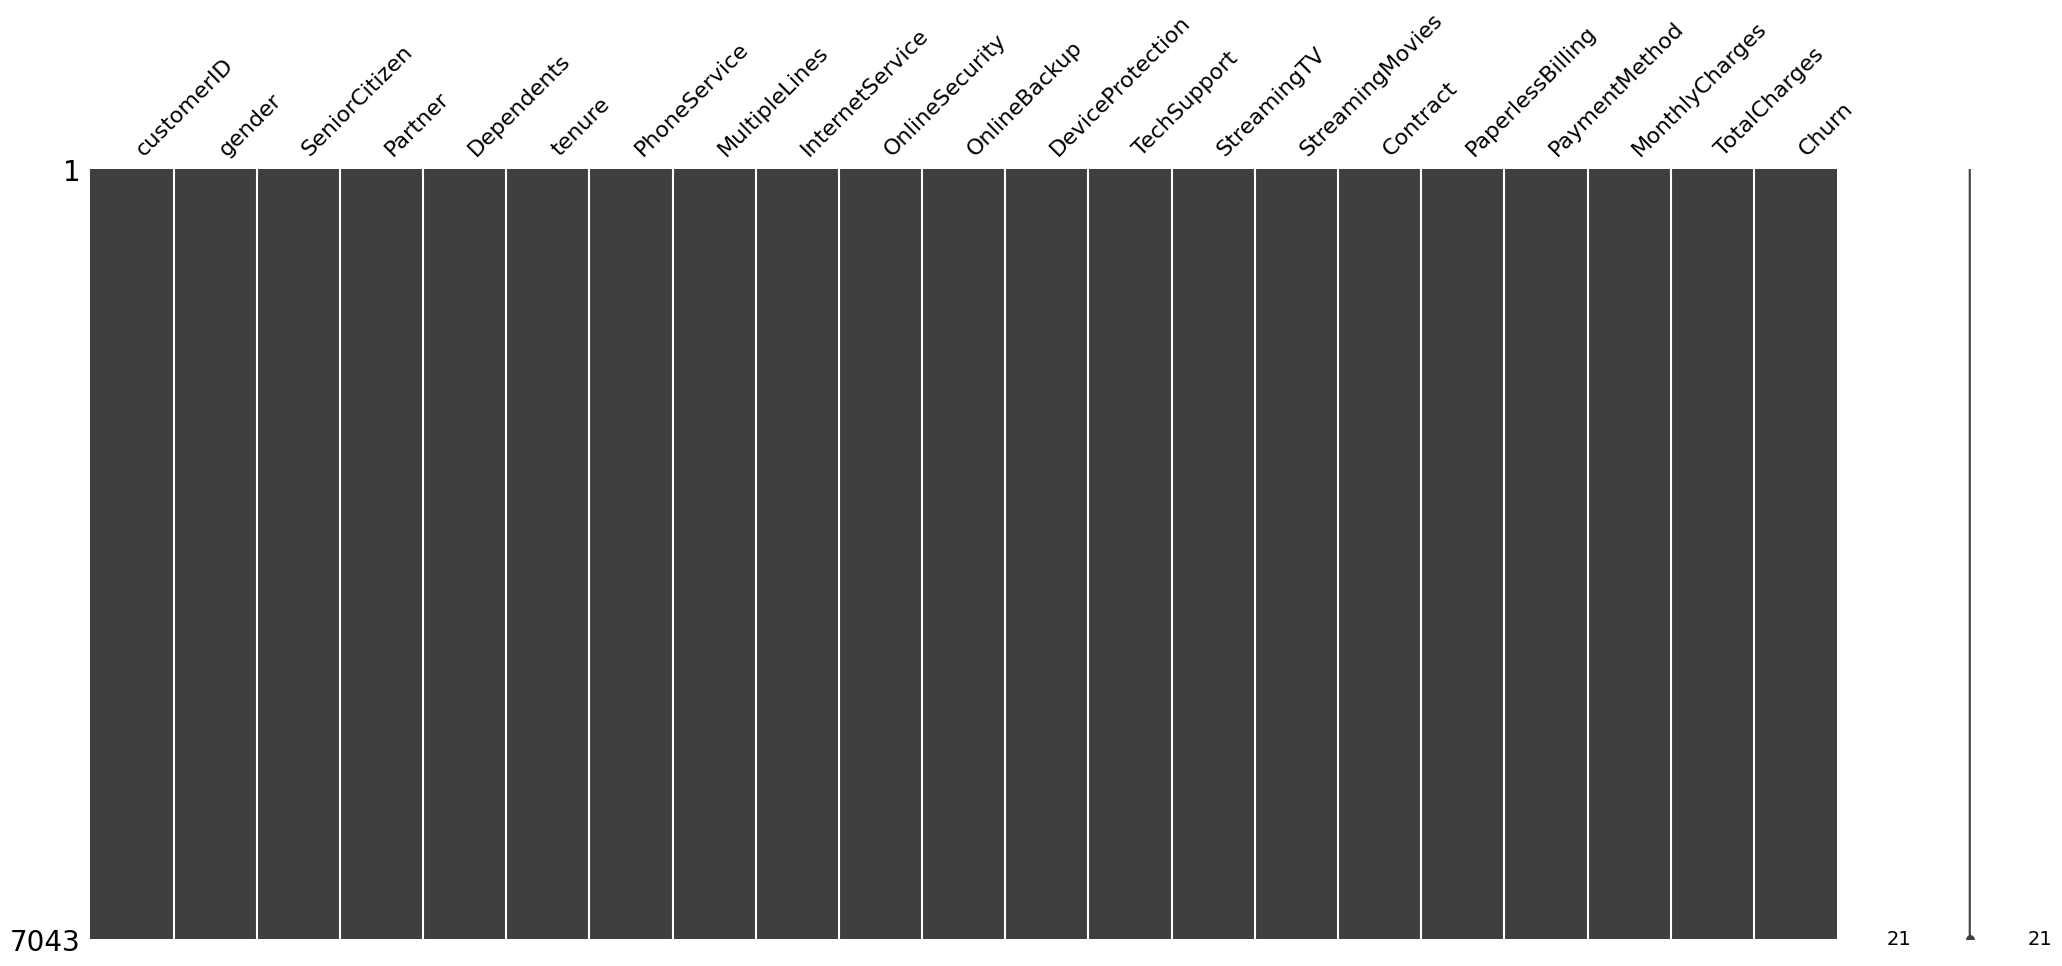

In [8]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
msno.matrix(df)

Pada pengecekan dalam bentuk visualisasi tidak ditemukan missing value pada data set, sehingga perlu dilakukan identifikasi lebih lanjut agar hasil analisis lebih efisien dan optimal.

## Manipulasi Data

Pada tahap ini akan melakukan identifikasi lebih lanjut pada dataset seperti melakukan drop pada kolom yang tidak dibutuhkan, mengatasi missing value, dan menyamakan skala distribusi agar memiliki hasil prediksi yang lebih optimal.

In [93]:
df = df.drop(['customerID'], axis = 1)

Customer ID tidak akan digunakan dalam Analyst, hal ini bertujuan agar hasil/output data lebih efisien

In [94]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [95]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

Pada data set, total Charges belum dijadikan menjadi numeric dan berpotensi mengalami missing value didalamnya, sehingga diperlukan pengecekkan lebih lanjut pada percobaan ke 4

In [96]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Pada hasil code menunjukkan Total Charge memiliki 11 missing value, sehingga diperlukan pengecekan ulang dan mengatasinya agar hasil yang diharapkan mampu efektif pada keputusan.

In [97]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Pada colom charges berubah menjadi Nan karena belum dilakukan define lebih lanjut, dan pada tenure terdapat value 0 di colom

In [98]:
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

terdapat 11 baris yang hilang pada colom tenure, untuk hasil yang lebih efisien 11 baris pada colom tenure akan di drop

In [99]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

In [100]:
df.fillna(df["TotalCharges"].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


Setelah mencari beberapa refrensi keputusan yang tepat untuk memperbaiki data yang hilang pada 11 baris TotalCharge adalah mengisi dengan mean pada kolom tersebut

In [101]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Pada percobaan kali ini value missing sudah dapat diperbaiki

In [102]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})

Untuk mengolah data nilai yang bersifat teks kategorial akan di ganti dengan 0/1 untuk mewakili no dan yes agar data dapat diolah

In [103]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [105]:
df["InternetService"].describe(include=['object', 'bool'])

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [106]:
df["Contract"].describe(include=['object', 'bool'])

count               7032
unique                 3
top       Month-to-month
freq                3875
Name: Contract, dtype: object

In [107]:
df["PaymentMethod"].describe(include=['object', 'bool'])

count                 7032
unique                   4
top       Electronic check
freq                  2365
Name: PaymentMethod, dtype: object

In [108]:
df["MultipleLines"].describe(include=['object', 'bool'])

count     7032
unique       3
top         No
freq      3385
Name: MultipleLines, dtype: object

In [109]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


setelah melihat data kembali, untuk analisis mengenai colum tenure, Monthly Charges, dan total charges menjadi numeric agar mengetahui distribusi data

In [110]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


Rata-rata pelanggan menggunakan layanan internet selama 32.42 bulan.
Rata-rata biaya bulanan layanan internet adalah 64.79.
Total biaya yang telah dibayarkan pelanggan rata-rata adalah 2283.30.
Sebagian besar pelanggan (75%) masih menggunakan layanan internet.
Biaya bulanan layanan internet yang paling rendah adalah 18.25, dan yang paling tinggi adalah 118.75.
Total biaya yang telah dibayarkan pelanggan yang paling rendah adalah 18.80, dan yang paling tinggi adalah 8684.80.

TENURE
25% pelanggan dalam tabel memiliki masa tenure yang lebih pendek dari 9 bulan, dan 75% pelanggan memiliki masa tenure yang lebih panjang dari 9 bulan.
50% pelanggan dalam tabel memiliki masa tenure yang lebih pendek dari 29 bulan, dan 50% pelanggan memiliki masa tenure yang lebih panjang dari 29 bulan.
75% pelanggan dalam tabel memiliki masa tenure yang lebih pendek dari 55 bulan, dan 25% pelanggan memiliki masa tenure yang lebih panjang dari 55 bulan.

Monthly Charges
25% pelanggan dalam tabel memiliki biaya bulanan yang lebih rendah dari 35.59, dan 75% pelanggan memiliki biaya bulanan yang lebih tinggi dari 35.59.
50% pelanggan dalam tabel memiliki biaya bulanan yang lebih rendah dari 70.35, dan 50% pelanggan memiliki biaya bulanan yang lebih tinggi dari 70.35.
75% pelanggan dalam tabel memiliki biaya bulanan yang lebih rendah dari 89.86, dan 25% pelanggan memiliki biaya bulanan yang lebih tinggi dari 89.86.

Total Charges
25% pelanggan dalam tabel memiliki total biaya yang lebih rendah dari 401.45, dan 75% pelanggan memiliki total biaya yang lebih tinggi dari 401.45.
50% pelanggan dalam tabel memiliki total biaya yang lebih rendah dari 1.397.48, dan 50% pelanggan memiliki total biaya yang lebih tinggi dari 1.397.48.
75% pelanggan dalam tabel memiliki total biaya yang lebih rendah dari 3.794,74, dan 25% pelanggan memiliki total biaya yang lebih tinggi dari 3.794,74.

## Data Visual

### Gender & Churn 

In [111]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes'] 

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),1, 2)

fig.update_traces(hole=.6, hoverinfo="label+percent+name", textfont_size=12)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    annotations=[dict(text='Gender', x=0.19, y=0.5, font_size=15, showarrow=False),
                 dict(text='Churn', x=0.80, y=0.5, font_size=15, showarrow=False)])
fig.show()

Pada pie chart komposisi pelanggan dari gender adalah 49.5% wanita dan 50.5% laki - laki
Terdapat 26,6% customer yang churn dan 73.46% tidak mengalami churn

In [112]:
df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

Berdasarkan data sampel, terdapat 2544 pelanggan wanita yang tidak churn dan 2619 pelanggan pria yang tidak churn.

In [113]:
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

Berdasarkan data sampel, terdapat 939 pelanggan wanita yang tidak churn dan 930 pelanggan pria yang tidak churn.

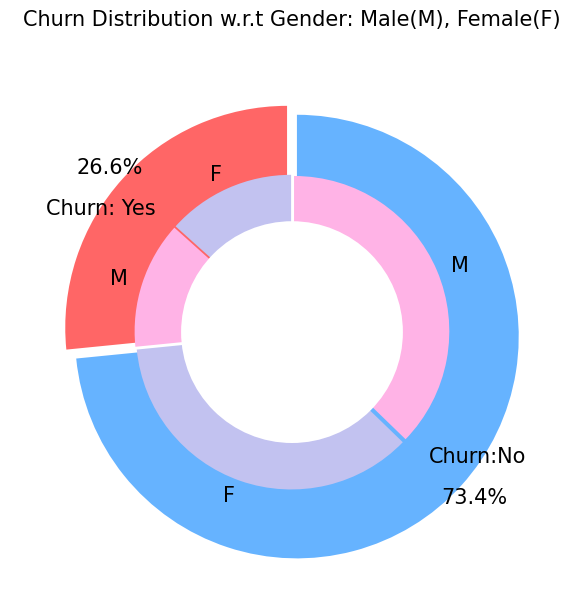

In [114]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}

plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

plt.axis('equal')
plt.tight_layout()
plt.show()

Pada visualisasi data terlihat bahwa proporsi gabungan antara 2 gender, dengan komposisi customer yang churn sebesar 26,6% dengan komposisi gender 939 pelanggan wanita yang tidak churn dan 930 pelanggan pria yang tidak churn. sedangkan customer yang tidak mengalami churn dengan komposisi 2544 pelanggan wanita yang tidak churn dan 2619 pelanggan pria yang tidak churn. Pada hasil ini gender pada wanita mengalami churn yang lebih tinggi daripada laki - laki, sehingga komposisi gender yang tidak mengalami churn gender wanita lebih rendah daripada gender pria


In [115]:
import pandas as pd
import plotly.express as px

### Kontrak & Churn 

In [116]:
labels = df['Contract'].unique()
values = df['Contract'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Contract distribution</b>")
fig.show()

In [117]:
fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

### Payment Method & Churn

In [118]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()


Overview Metode Pembayaran :
1. Metode pembayaran yang paling tinggi adalah Electronic check dengan 33.6%
2. Pada metode pembayaran Mailed Check sebanyak 22.8%
3. Customer yang melakukan pembayaran dengan metode Transfer Bank sebanyak 21.9%
4. Sedangkan metode pembayaran terendah adalah Credit Card dengan 21.6%

In [119]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", barmode="group", title="<b>Customer Payment Method distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Overviwe Data Customer Payment : 

Customer No Churn : 
1. Mailed Check sebanyak 1296
2. Electronic Check sebanyak 1294
3. Credit Card sebanyak 1289
4. Bank Transfer sebanyak 1284

Customer Yes Churn (Mengalami Churn) :
1. Electronic Check sebanyak 1071
2. Mailed Check sebanyak 308
3. Bank Transfer sebanyak 258
4. Credit Card sebanyak 232

Kesimpulan : 
Pada customer yang Churn menunjukkan bahwa electronic check cenderung churn yang berada posisi nomer 1 pada pengguna metode pembayaran yang berpotensi churn.

Perhitungan tingkat churn Payment metode :
(Total Customer Churn/Total Customer) x 100%

Electric mailed Cek 
(1071 Customer Churn/2365 Total Customer Electric mailed Cek) x 100% = 45.31 %
Berdasarkan hasil perhitungan ulang, tingkat churn pelanggan electric payment kini menjadi lebih tinggi, yaitu sebesar 45.31%. Ini menunjukkan bahwa proporsi pelanggan yang berhenti menggunakan layanan electric payment lebih besar 

### Internet Service Gender, dan Churn


In [120]:
#Identifikasi Value pada colum Internet Service
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [121]:
#Identifikasi internet service dengan informasi customer dengan gender dan tingkat churn

#Percobaan 1 pada gender male
df[df["gender"]=="Male"][["InternetService", "Churn"]].value_counts()


InternetService  Churn
DSL              No       992
Fiber optic      No       910
No               No       717
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
Name: count, dtype: int64

In [122]:
#Identifikasi internet service dengan informasi customer dengan gender dan tingkat churn

#Percobaan 2 pada gender Female
df[df["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       965
Fiber optic      No       889
No               No       690
Fiber optic      Yes      664
DSL              Yes      219
No               Yes       56
Name: count, dtype: int64

In [123]:
#Visualisasi Data internet service dengan churn dan gender

fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()

Pada grafik dapat terlihat bahwa pengguna layananan internet service yaitu fiber optic baik itu female atau male mengalami jumlah churn yang cukup besar dari pada item yang ada pada internet service. Secara Kumultaif pengguna Fiber Optic adalah 1799 yang tidak mengalami Churn dan sebanyak 1327, sehingga diperlukan peninjaua ulang mengenai layanan fiber optic.

Perhitungan Tingkat Churn
(Total penlanggan churn/ Total Pelanggan Kumulatif)*100%

Fiber Optic : 
 (1327 pelanggan Churn / 3126 pelanggan Fiber Optic) x 100% = 42.48% 
 Tingkat churn rate 42.48% berarti dari 100 pelanggan fiber optic, 42.48 di antaranya membatalkan langganan mereka.

DSL :
(459 Pelanggan Churn / 2416 Pelanggan DSL) x 100% = 19 % 
 Tingkat churn rate 19.01% berarti dari 100 pelanggan fiber optic, 19.01 di antaranya membatalkan langganan mereka.

### Dependent & Churn

In [124]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Overview Data : 
1. Customer yang tidak memiliki tanggungan cenderung churn sebanyak 1543
2. Sedangkan untuk customer yang memiliki tanggungan memiliki tingkat churn sebanyak 326

### Partners & Churn Distribution

In [125]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Partners & Churn Distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Overview Data : 
1. Customer yang tidak memiliki pasangan cenderung mengalami churn sebesar 1200
2. Dibandingkan dengan customer yang memiliki pasangan mengalami churn yang lebih sedikit yaitu 669

### Senior Citizen & Churn Distribution

In [126]:
fig = px.histogram(df, x="Churn", color="SeniorCitizen", barmode="group", title="<b>Senior Citizen & Churn Distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Overview Data : 
1. Customer yang tidak termasuk lanjut usia cenderung churn sebanyak 1393 customer
2. Sedangkan pada customer yang lanjut usia memiliki tingkat churn yang lebih sedikit yaitu 476, namun customer yang lanjut usia dan tidak
   mengalami churn sebanyak 666 dengan ratio 1:4, kemungkinan lanjut usia untuk tidak mengalami churn adalah 1.4 kali lebih besar daripada kemungkinan     mereka untuk mengalami churn.

#Perhitungan Churn

SeniorCitizen (Lanjut usia) :
(476 pelanggan churn/ 1142) x 100% = 41,66%
Tingkat churn rate 41.66% berarti dari, 41.66 di antaranya membatalkan langganan mereka.Pada faktor ini, lanjut usia atau SeniorCitizen rentan terhadap tingkat churn

### OnlineSecurty & Churn

In [127]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>OnlineSecurity & Churn Distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Overview Data : 
1. Cutomer yang tidak menggunakan online security cenderung mengalami churn sebanyak 1461
2. Sedangkan untuk customer yang No Internet Service mengalami tingkat churn terendah sebanyak 113 customer

Online Security (No)
(1461/3497) x 100% = 41.6%
Pada customer yang tidak menggunakan OnlienSecurity memiliki tingkat Churn yang cukup besar atau dari 100 pelanggang customer sebanyak 41 customer mengalami churn


### Papperless Billing & Churn

In [128]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="PaperlessBilling",barmode="group", title="<b>Papperlees Billing & Churn Distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Overview Data :
1. Customer dengan Paperless Billing cenderung mengalami churn sebanyak 1400
2. Customer tanpa paperless Billing memiliki tingkat terendah pada churn sebanyak 469

### Tech Support & Churn 

In [129]:
fig = px.histogram(df, x="Churn", color="TechSupport",barmode="group",  title="<b>TechSupport & Churn Distribution</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


Overview Data :
1. Customer yang tidak memiliki/tidak menggunakan 'TechSupport' cenderung mengalami churn sebanyak 1446
2. Sedangkan customer No internet Service mengalami churn dengan tingkat terendah sebanyak 113

Perhitungan Churn TechSupport (No)
(1446/3472) x 100 = 41.63%
Pelanggan yang mengalami tingkat churn adalah pelanggan yang tidak menggunakan/tidak memiliki support teknin cenderung mengalami churn

### Phone Service & Churn

In [130]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="PhoneService",  barmode="group", title="<b>Phone Service & Churn Distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Overview Data : 
1. Customer yang menggunakan pelayanan PhoneService memiliki tingkat churn tertinggi yaitu 1699
2. Cutomer yang tidak menggunakan pelayan PhoneService memiliki tingkat churn terendah sebesar 170, dengan ratio 3.0 menunjukkan bahwa terdapat 3 pengguna phone service yang tidak mengalami churn untuk setiap 1 pengguna yang mengalami churn.

Perhitungan Churn PhoneService (No)

(170/680) x 100% = 25 %
customer yang termasuk tidak menggunakan layanan service cenderung lebih mudah churn dengan tingkat churn 25%

### Monthly Charges & Churn Distribution

In [131]:
import seaborn as sns

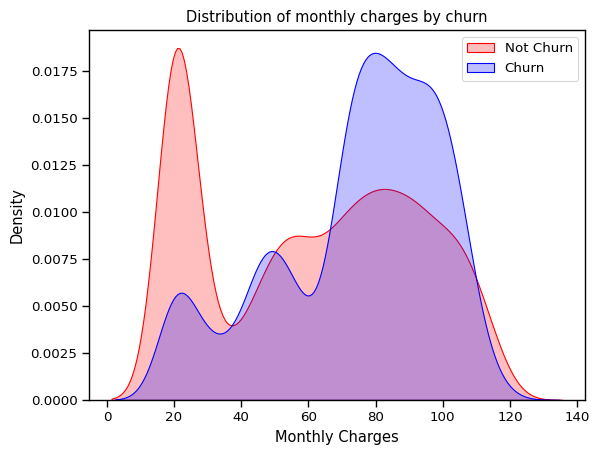

In [132]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

Overview Data : 

1. Pelanggan yang churn cenderung memiliki biaya bulanan yang lebih tinggi dibandingkan pelanggan yang tidak churn. Hal ini ditunjukkan oleh posisi    
   kurva biru yang lebih ke kanan

2. Terdapat variasi biaya bulanan yang lebih besar di antara pelanggan yang churn dibandingkan pelanggan yang tidak churn. Hal ini ditunjukkan oleh
   kurva biru yang lebih lebar.

   Penyebab kurva biru lebih besar :

    - Pelanggan yang mengalami churn lebih sensitif terhadap perubahan harga
    - Pelanggan yang churn memiliki barang subsitusi yang lebih murah/yang lebih baik

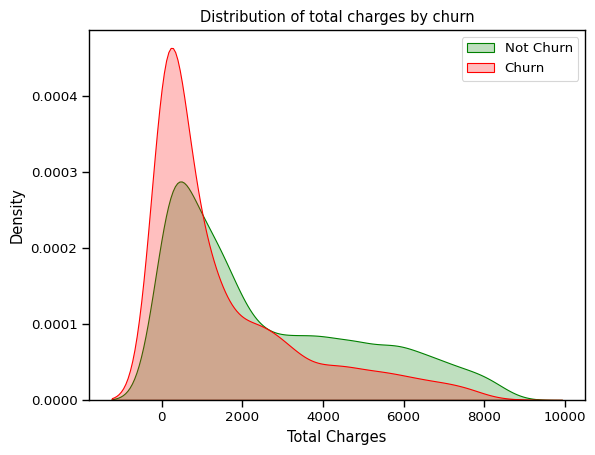

In [133]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Green", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Red", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

### Tenure & Churn Distribution

In [134]:
fig = px.box(df, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

Overview Data : 
1. Pada grafik tersebut menunjukkan adanya hubungan antara durasi berlangganan dan tingkat churn.
2. Customer yang berlangganan lebih lama cenderung tidak mengalami churn.
3. Pada interquatile range untuk pelanggan yang churn lebih besar dari pelanggan yang tidak churn, sehingga menunjukkan bahwa ada lebih banyak
   variabilitas dalam durasi di antara pelanggan yang churn.
4. Pada whiskers tersebut pelanggan yang churn meluas lebih jauh ke kiri daripada kumis untuk pelanggan yang tidak churn. Ini menunjukkan bahwa ada
   proporsi pelanggan yang churn lebih tinggi dengan durasi yang sangat singkat.

### Korelasi Matrix

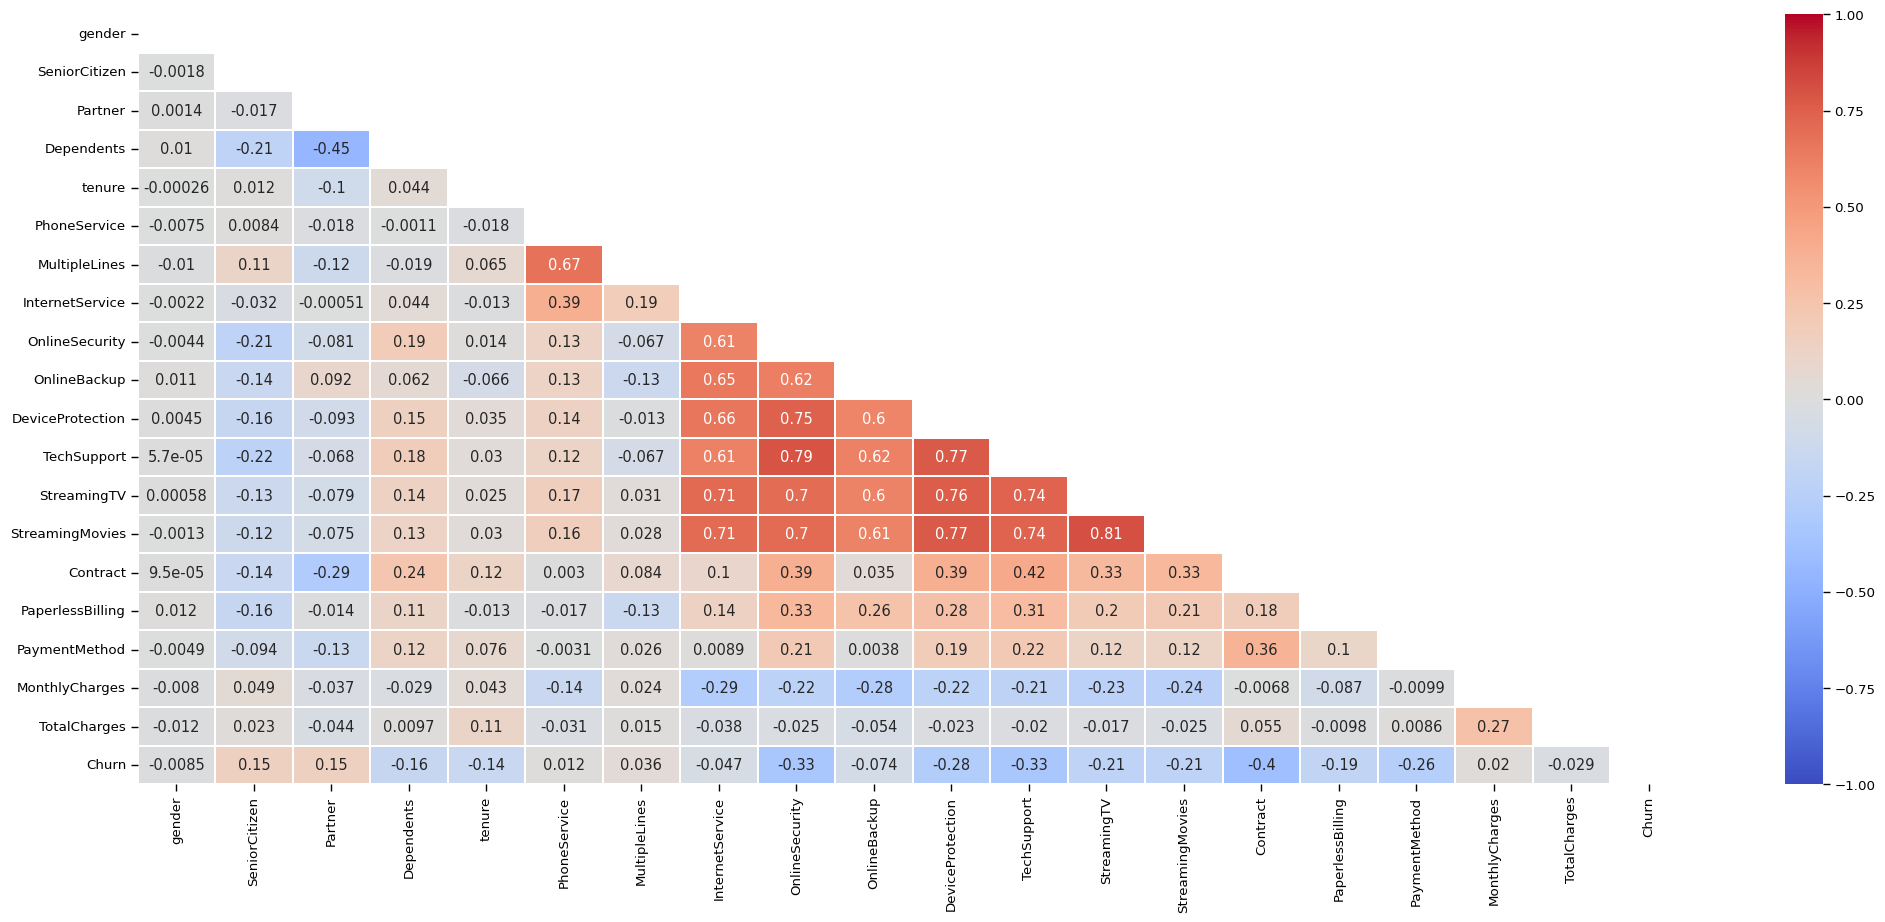

In [135]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)


Matrix korelasi di gunakan untuk mengetahui apakah korelasi dengan faktor customer berhubungan dengan tingkat churn atau tidak

tabel yang menunjukkan hubungan antara dua variabel. Nilai korelasi berkisar antara -1 dan 1. Nilai korelasi positif menunjukkan bahwa kedua variabel bergerak dalam arah yang sama. Nilai korelasi negatif menunjukkan bahwa kedua variabel bergerak dalam arah yang berlawanan. Nilai korelasi 0 menunjukkan bahwa tidak ada hubungan antara kedua variabel.

Faktor - faktor yang berkorelasi dengan Churn : 

1. SeniorCitizen bergerak searah dengan Churn dengan nilai (0.15)

2. Partner bergerak positif dengan churn sebesar (0.15)

3. MonthlyCharges bergerak searah tetapi dalam korelasi yang lemah dengan nilai (0.02)

4. PhoneService bergerak searah tetapi dalam korelasi yang lemah dengan nilai (0.012)

5. MultipleLines bergerak searah tetapi dalam korelasi yang lemah dengan nilai (0.036)


Insight lebih lanjut dengan melihat hasil data visual sebelumnya :

1. Pelanggan yang sudah lama bergabung dengan perusahaan jauh lebih kecil kemungkinannya untuk churn daripada pelanggan baru.

2. Pelanggan dengan tagihan bulanan yang lebih tinggi lebih kecil kemungkinannya untuk churn daripada pelanggan dengan tagihan bulanan yang
   lebih rendah
3. Pelanggan dengan total tagihan yang lebih tinggi sedikit lebih kecil kemungkinannya untuk churn daripada pelanggan dengan total tagihan yang lebih
   rendah
   

## Data Prepocessing

Data Preprocessing, atau Praproses Data, adalah langkah penting dalam Data Science untuk mengubah data mentah menjadi format yang bersih, terstruktur, dan konsisten. Hal ini dilakukan agar data siap dianalisis dan diolah lebih lanjut untuk menghasilkan informasi yang berharga.

Manfaat Utama Data Preprocessing:

1. Meningkatkan Kualitas Data: Membersihkan data dari noise, kehilangan nilai, dan inkonsistensi, sehingga menghasilkan data yang lebih akurat dan   andal.
2. Memudahkan Analisis: Mengubah data ke dalam format yang lebih terstruktur dan mudah dipahami oleh algoritma dan model pembelajaran mesin.
3. Meningkatkan Efisiensi: Mengurangi waktu dan sumber daya yang dibutuhkan untuk pemrosesan data, sehingga analisis data menjadi lebih cepat dan efisien.

Tahapan Utama dalam Data Preprocessing:

1. Pembersihan Data: Menghapus nilai yang hilang, outlier, dan duplikat.
2. Transformasi Data: Mengubah format data, seperti normalisasi, scaling, dan encoding.
3. Pengintegrasian Data: Menggabungkan data dari berbagai sumber yang berbeda.
4. Reduksi Data: Mengurangi jumlah data tanpa kehilangan informasi penting.

In [136]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

Mengubah isi data berupa kategorial pada pandas menjadi angka. agar bisa di jalankan oleh machine learning

In [137]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


Data sudah berupa angka

In [138]:
#Menghitung koefisien korelasi Pearson antara kolom Churn dan faktor customer
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

In [139]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

test_size = 0.30
menentukan bahwa 30% dari data akan digunakan untuk 
set pengujian dan sisanya 70% akan digunakan untuk training set.

Random test = 40
memastikan keberulangan dengan menyetel seed untuk bilangan acak.

In [141]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

Membuat visualisasi bagaimana nilai-nilai dalam fitur (kolom) tertentu dari dataframe teleco churn terdistribusi. 
berguna untuk memahami kecenderungan sentral (mean, median), penyebaran (varian), dan potential outliers dalam data.

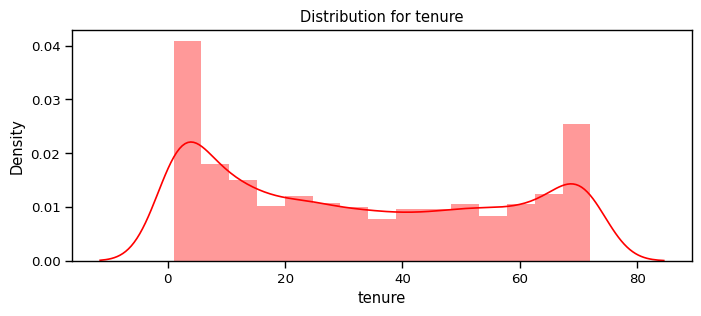

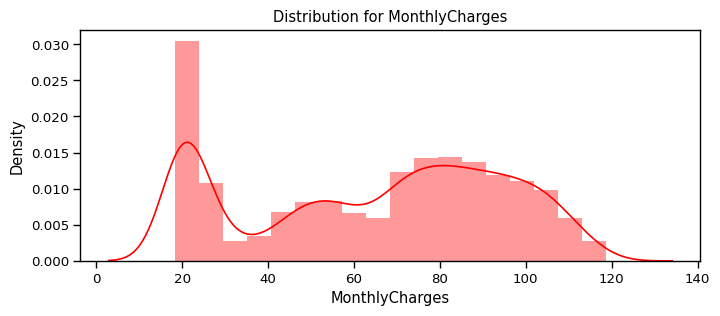

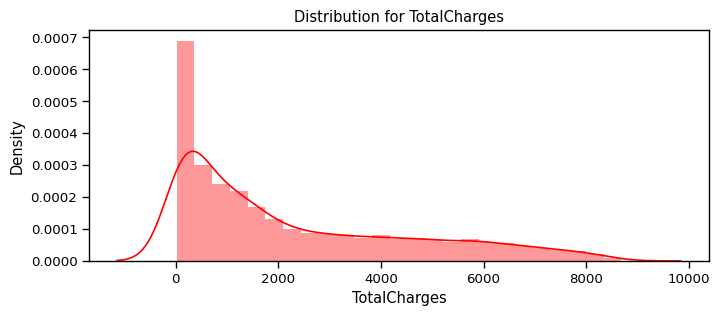

In [142]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

Pada grafik terlihat numerik terdibustri pada 3 faktor dengan numerik yang berbeda, sehingga lebih efektif apabila menggunakan skala standart yang sama

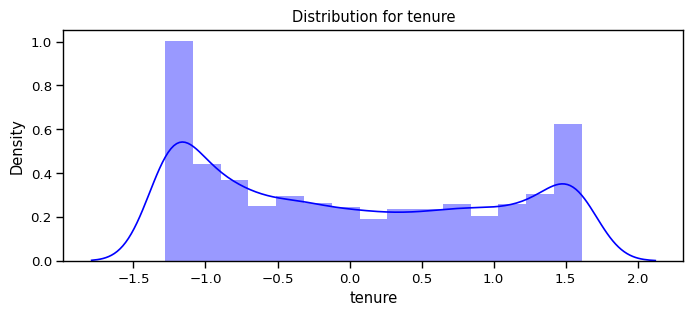

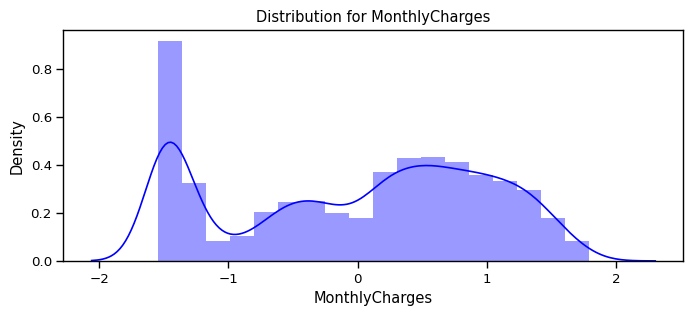

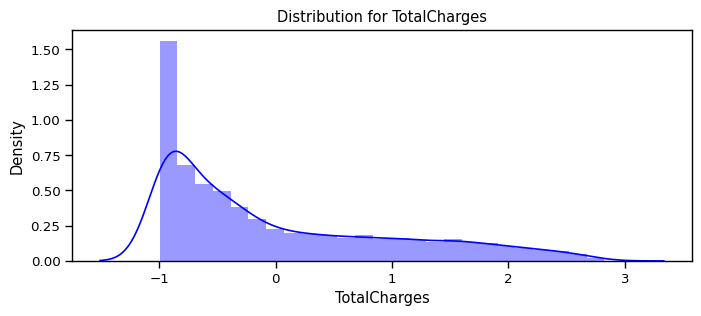

In [143]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in numerical_cols: distplot(feat, df_std, color='b')


Sekarang numerik atau float yang ada pada 3 kolom tersebut sudah dirubah menjadi skala yang sama dan diharapkan dapat mengoptimalkan hasil analisi

## Model Evaluasi dan prediksi

### AdaBoost Clasiffer

In [144]:
from sklearn.ensemble import AdaBoostClassifier

In [145]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("Ada Booster Classifier is:",accuracy_lr)

Ada Booster Classifier is: 0.8037914691943128


In [146]:
print(classification_report(y_test, a_preds))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.67      0.55      0.60       561

    accuracy                           0.81      2110
   macro avg       0.76      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



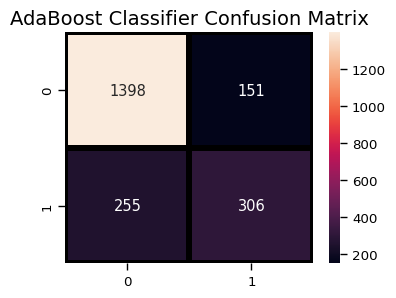

In [147]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

### Gradient Boosting Classifier

In [167]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.8075829383886256


In [168]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.67      0.55      0.60       561

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



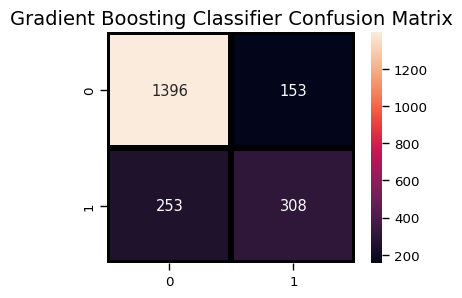

In [169]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()

### Logistic Regression

In [150]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8037914691943128


In [151]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.65      0.57      0.61       561

    accuracy                           0.80      2110
   macro avg       0.75      0.73      0.74      2110
weighted avg       0.80      0.80      0.80      2110



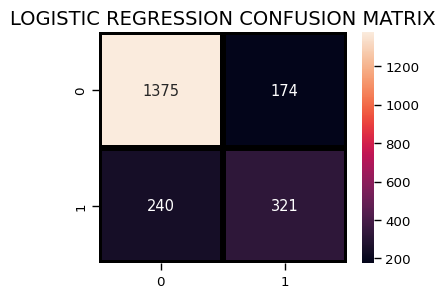

In [152]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

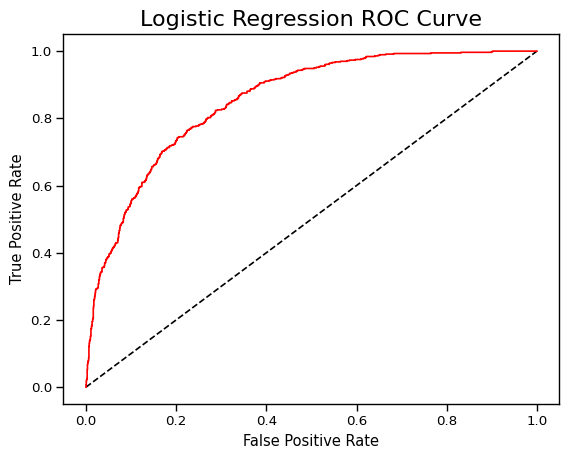

In [153]:
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

### Random Forest

In [172]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = 0.7,
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

prediction_test = model_rf.predict(X_test)
print("Random Forest Accuracy is:", accuracy_score(y_test, gb_pred))

Random Forest Accuracy is: 0.8075829383886256


In [173]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.67      0.53      0.59       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.80      0.80      2110



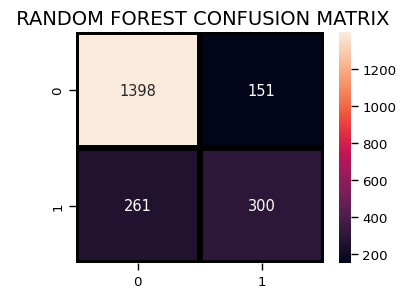

In [174]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

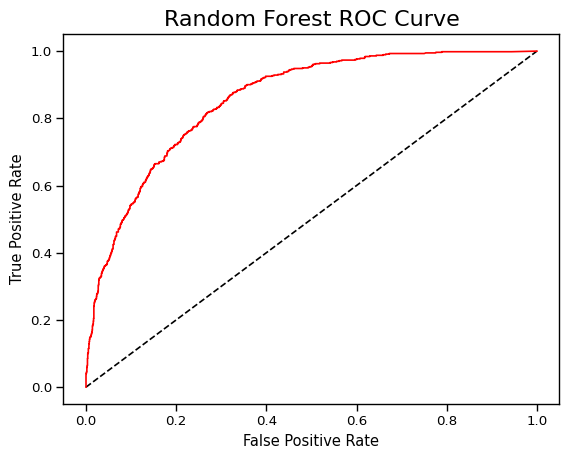

In [175]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

### Desicion Tree Clasifier

In [181]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7298578199052133


In [182]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1549
           1       0.49      0.53      0.51       561

    accuracy                           0.73      2110
   macro avg       0.66      0.67      0.66      2110
weighted avg       0.74      0.73      0.73      2110



###  K-Neighbors Classifier

In [183]:
knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("K-Neighbors Classifier is:",accuracy_knn)

K-Neighbors Classifier is: 0.7819905213270142


In [184]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1549
           1       0.63      0.44      0.52       561

    accuracy                           0.78      2110
   macro avg       0.72      0.67      0.69      2110
weighted avg       0.77      0.78      0.77      2110



### SVC

In [187]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVC accuracy is :",accuracy_svc)

SVC accuracy is : 0.7341232227488151


In [188]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1549
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2110
   macro avg       0.37      0.50      0.42      2110
weighted avg       0.54      0.73      0.62      2110



### Voting Classifier

In [190]:
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))

Final Accuracy Score 
0.8161137440758294


In [191]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1549
           1       0.69      0.57      0.62       561

    accuracy                           0.82      2110
   macro avg       0.77      0.74      0.75      2110
weighted avg       0.81      0.82      0.81      2110



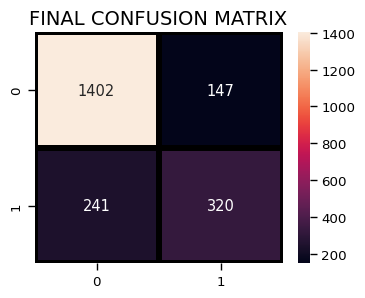

In [192]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()


Prediksi Benar:
Kiri Atas: Pelanggan yang tidak churn (tetap langganan) dan model memprediksi mereka tidak akan churn (benar) (1402).
Kanan Bawah: Pelanggan yang churn (berhenti langganan) dan model memprediksi mereka akan churn (benar) (320).

Prediksi Salah:
Kanan Atas: Pelanggan yang tidak churn (tetap langganan) tetapi model memprediksi mereka akan churn (salah) (147).
Kiri Bawah: Pelanggan yang churn (berhenti langganan) tetapi model memprediksi mereka tidak akan churn (salah) (241).

Kesimpulan : 
Dari 1549 pelanggan yang sebenarnya tidak churn, model memprediksi dengan benar 1402 (ideal).
Tapi, model salah memprediksi 147 dari mereka akan churn (tidak ideal).
Ada 561 pelanggan yang sebenarnya churn, dan model mengidentifikasi dengan benar 324.
Namun, model melewatkan 241 pelanggan yang churn dengan memprediksi mereka akan tetap langganan (perlu perbaikan).

## Hasil Prediksi

In [146]:
import numpy as np

In [147]:
confusion_matrix = np.array([
    [1402, 147],
    [241, 320]
])

In [148]:
total_pelanggan = np.sum(confusion_matrix)

In [150]:
prediksi_churn_salah = confusion_matrix [1,0]

In [151]:
presentase_prediksi_churn = (prediksi_churn_salah / total_pelanggan) * 100

In [152]:
print("Presentase Prediksi Churn:", presentase_prediksi_churn, "%")

Presentase Prediksi Churn: 11.421800947867299 %


## Kesimpulan & Rekomendasi

Berdasarkan hasil prediksi, terdapat beberapa poin penting terkait tingkat churn pelanggan di masa depan, yaitu:

Tingkat churn secara keseluruhan diprediksikan mencapai 11%. Hal ini menunjukkan bahwa perlu dilakukan langkah-langkah untuk mempertahankan pelanggan dan mengurangi churn rate.

Beberapa faktor yang memiliki tingkat churn tinggi:

1. Metode Pembayaran: Penggunaan cek elektrik memiliki tingkat churn tertinggi yaitu 45.31%. Hal ini menunjukkan bahwa metode pembayaran ini mungkin kurang nyaman atau menarik bagi pelanggan.
2. Pelanggan Lanjut Usia: Pelanggan lanjut usia memiliki tingkat churn 41.66%. Hal ini menunjukkan bahwa kelompok pelanggan ini mungkin memerlukan bantuan tambahan atau layanan yang lebih mudah digunakan.
3. Keamanan Online (Tidak): Pelanggan yang tidak menggunakan layanan keamanan online memiliki tingkat churn 41.6%. Hal ini menunjukkan bahwa pelanggan mungkin lebih rentan terhadap penipuan atau serangan siber dan membutuhkan perlindungan yang lebih baik.
4. Dukungan Teknis (Tidak): Pelanggan yang tidak menggunakan atau tidak memiliki dukungan teknis memiliki tingkat churn 41.63%. Hal ini menunjukkan bahwa pelanggan mungkin memerlukan bantuan untuk menyelesaikan masalah dan menghargai dukungan yang tersedia.

Rekomendasi:

1. Analisis lebih lanjut: Lakukan analisis lebih lanjut untuk memahami alasan churn pada setiap segmen pelanggan (Survey Kepuasan)
2. Solusi yang ditargetkan: Kembangkan solusi yang ditargetkan untuk mengatasi masalah churn pada setiap segmen pelanggan.
3 Meningkatkan komunikasi: Tingkatkan komunikasi dengan pelanggan, terutama dengan pelanggan lanjut usia dan mereka yang tidak menggunakan layanan keamanan online.
4. Mempermudah akses ke dukungan: Pastikan dukungan teknis mudah diakses dan tersedia untuk semua pelanggan.
Menawarkan insentif: Tawarkan insentif kepada pelanggan untuk tetap menggunakan layanan, seperti diskon atau layanan tambahan.